# Data Categorization and Assignment

In [42]:
#necessary imports
import pandas
import numpy as np
import tensorflow.keras as keras
from keras.models import Model
from keras.layers import Dense, Input
from IPython.display import display
import sympy as sp
sp.init_printing(use_latex = True)

import matplotlib.pyplot as plt
%matplotlib inline

#retrieve vector data from gamestate
inputGamestate = np.array(pandas.read_table("nineFullData(2)_Validated.txt", delim_whitespace = True, header = None))

#Current state of the board
boardState = inputGamestate[:, 0:243]

#Coordinate of move made to achieve board state (bottom left of the board being 0, 0)
coordinate = inputGamestate[:, 243:245]

#Legality checker for the move
legal = inputGamestate[:, 245]

#Black or white to move from this position(-1 or 1 respectively)
whoseTurn = inputGamestate[:, 246]

#Who won from this position (-1 or 1 respectively, 0 for play continues)
whoWon = inputGamestate[:, 247]

#Move to be made from this powsition
playersMove = inputGamestate[:, 248]

#Input to Neural Net
X = inputGamestate[:, 0:248]

#Creating 81 categories based on every spot on the board, 1 representing the move to be made
Y = keras.utils.to_categorical(playersMove, len(np.unique(playersMove)))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Building the Model

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 248)]             0         
_________________________________________________________________
dense_18 (Dense)             (None, 1000)              249000    
_________________________________________________________________
dense_19 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_21 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_22 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_23 (Dense)             (None, 82)                8208

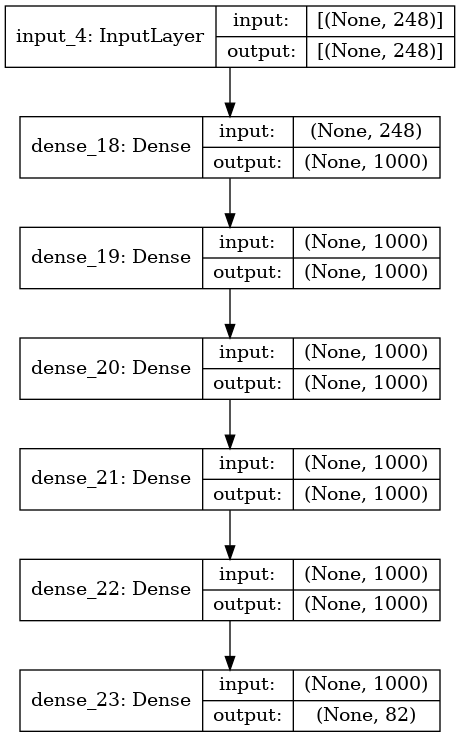

In [46]:
#defining input shape (board state)
input_size = X.shape[1]

#defining output shape 
output_size = Y.shape[1]

input1 = Input(shape = input_size)
hidden1 = Dense(1000, activation = 'relu')(input1)
hidden2 = Dense(1000, activation = 'relu')(hidden1)
hidden3 = Dense(1000, activation = 'relu')(hidden2)
hidden4 = Dense(1000, activation = 'relu')(hidden3)
hidden5 = Dense(1000, activation = 'relu')(hidden4)
output = Dense(82, activation = 'softmax')(hidden5)
model = Model(inputs = input1, outputs = output)

model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer = keras.optimizers.Adam(), metrics = [keras.metrics.CategoricalAccuracy()])
model.summary()
keras.utils.plot_model(model, show_shapes = True, expand_nested = True, show_layer_names = True)

#0 if the game ends
#1 - 81
#row major order from top left, bottom right is 81

Training

In [49]:
#Train the model
history = model.fit(X, Y, batch_size = 128, epochs = 1, verbose = 0, validation_split = 0.4)

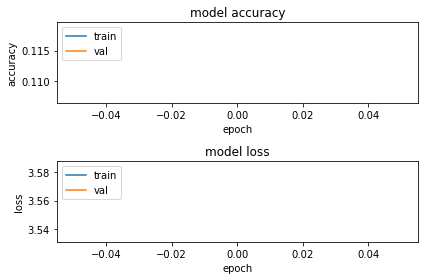

In [50]:
plt.figure(1)

plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()